In [2]:
#imorting packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:/practice/Datasets/Covid 19 Vaccines Location.csv')
df.head(10)

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",27-12-2021,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",28-12-2021,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",21-12-2021,World Health Organization,https://covid19.who.int/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12-12-2021,World Health Organization,https://worldhealthorg.shinyapps.io/EURO_COVID...
4,Angola,AGO,Oxford/AstraZeneca,30-12-2021,World Health Organization,https://africacdc.org/covid-19-vaccination/
5,Anguilla,AIA,"Oxford/AstraZeneca, Pfizer/BioNTech",08-12-2021,World Health Organization,https://ais.paho.org/imm/IM_DosisAdmin-Vacunac...
6,Antigua and Barbuda,ATG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",29-12-2021,Ministry of Health,https://covid19.gov.ag
7,Argentina,ARG,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",02-01-2022,Ministry of Health,https://www.argentina.gob.ar/coronavirus/vacun...
8,Armenia,ARM,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",26-12-2021,World Health Organization,https://www.moh.am/#1/4695
9,Aruba,ABW,Pfizer/BioNTech,30-12-2021,Government of Aruba,https://www.government.aw


In [4]:
print("Dimensions of the dataframe:",df.shape)

Dimensions of the dataframe: (223, 6)


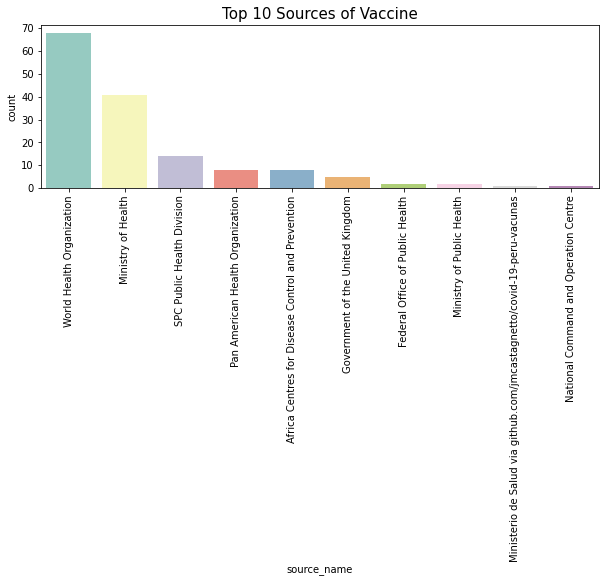

In [5]:
#plotting top 10 sources of Vaccines
plt.figure(figsize=(10, 3))
plt.title('Top 10 Sources of Vaccine', fontsize=15)
sns.countplot(x = "source_name",data=df, palette="Set3",order=df.source_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [6]:
#Now I am trying to create a dataframe with just the vaccines and location data in it
df1 = df['vaccines'].str.split(',', expand=True)
df1.shape

(223, 8)

In [7]:
df1.columns = ['vaccine1','vaccine2','vaccine3','vaccine4','vaccine5','vaccine6','vaccine7','vaccine8']
df1.head(5)

,vaccine1,vaccine2,vaccine3,vaccine4,vaccine5,vaccine6,vaccine7,vaccine8
0,Johnson&Johnson,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,None,None,None,None
1,Oxford/AstraZeneca,Pfizer/BioNTech,Sinovac,Sputnik V,None,None,None,None
2,Oxford/AstraZeneca,Sinopharm/Beijing,Sinovac,Sputnik V,None,None,None,None
3,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,None,None,None,None,None
4,Oxford/AstraZeneca,None,None,None,None,None,None,None


In [8]:
def colname():
    df3.columns = col_name

In [9]:
df2 = pd.concat([df1['vaccine1'],df['location']],axis=1)
col_name = ["Vaccine_Name","Location"]
df2.columns = col_name

for i, column in enumerate(df1.columns):
    if i != 0:
        col = df1.columns[i]
        
        df3 = pd.concat([df1[df1.columns[i]],df['location']],axis=1)
        colname()   
        
        df2 = pd.concat([df2, df3], ignore_index=True)
        del df3

In [33]:
df2['Vaccine_Name'] =df2['Vaccine_Name'].str.strip() #now df2 has only vaccine names and location

In [35]:
#checking and dropping null values
df2.isnull().sum()

Vaccine_Name    1063
Location           0
dtype: int64

In [38]:
df2.dropna(inplace=True)
df2.shape

(721, 2)

In [10]:
#using crosstab to plot relation between vaccine name and location
pd.crosstab(df2.Vaccine_Name,df2.Location,normalize = "index" ).style.background_gradient(cmap='Dark2_r')

In [41]:
df2.groupby('Vaccine_Name').apply(display)

,Vaccine_Name,Location
49,Abdala,Cuba
142,Abdala,Nicaragua
216,Abdala,Venezuela
217,Abdala,Vietnam


,Vaccine_Name,Location
93,COVIran Barekat,Iran


,Vaccine_Name,Location
7,CanSino,Argentina
40,CanSino,Chile
41,CanSino,China
58,CanSino,Ecuador
121,CanSino,Malaysia
127,CanSino,Mexico
151,CanSino,Pakistan


,Vaccine_Name,Location
26,Covaxin,Botswana
38,Covaxin,Central African Republic
43,Covaxin,Comoros
91,Covaxin,India
126,Covaxin,Mauritius
138,Covaxin,Nepal
155,Covaxin,Paraguay
316,Covaxin,Iran
374,Covaxin,Pakistan


,Vaccine_Name,Location
163,EpiVacCorona,Russia
205,EpiVacCorona,Turkmenistan


,Vaccine_Name,Location
0,Johnson&Johnson,Afghanistan
11,Johnson&Johnson,Austria
13,Johnson&Johnson,Bahamas
18,Johnson&Johnson,Belgium
19,Johnson&Johnson,Belize
...,...,...
221,Johnson&Johnson,Zambia
249,Johnson&Johnson,Botswana
350,Johnson&Johnson,Mexico
361,Johnson&Johnson,Nepal


,Vaccine_Name,Location
194,Medigen,Taiwan


,Vaccine_Name,Location
3,Moderna,Andorra
8,Moderna,Armenia
10,Moderna,Australia
15,Moderna,Bangladesh
22,Moderna,Bhutan
...,...,...
440,Moderna,Vietnam
472,Moderna,Botswana
573,Moderna,Mexico
584,Moderna,Nepal


,Vaccine_Name,Location
1,Oxford/AstraZeneca,Albania
2,Oxford/AstraZeneca,Algeria
4,Oxford/AstraZeneca,Angola
5,Oxford/AstraZeneca,Anguilla
6,Oxford/AstraZeneca,Antigua and Barbuda
...,...,...
663,Oxford/AstraZeneca,Vietnam
695,Oxford/AstraZeneca,Botswana
796,Oxford/AstraZeneca,Mexico
807,Oxford/AstraZeneca,Nepal


,Vaccine_Name,Location
9,Pfizer/BioNTech,Aruba
45,Pfizer/BioNTech,Cook Islands
72,Pfizer/BioNTech,Gabon
77,Pfizer/BioNTech,Gibraltar
88,Pfizer/BioNTech,Hong Kong
...,...,...
886,Pfizer/BioNTech,Vietnam
918,Pfizer/BioNTech,Botswana
1019,Pfizer/BioNTech,Mexico
1030,Pfizer/BioNTech,Nepal


,Vaccine_Name,Location
103,QazVac,Kazakhstan


,Vaccine_Name,Location
17,Sinopharm/Beijing,Belarus
32,Sinopharm/Beijing,Burundi
39,Sinopharm/Beijing,Chad
62,Sinopharm/Beijing,Equatorial Guinea
108,Sinopharm/Beijing,Kyrgyzstan
...,...,...
1056,Sinopharm/Beijing,Rwanda
1095,Sinopharm/Beijing,Tunisia
1109,Sinopharm/Beijing,Vietnam
1253,Sinopharm/Beijing,Nepal


,Vaccine_Name,Location
487,Sinopharm/Wuhan,China
879,Sinopharm/Wuhan,United Arab Emirates


,Vaccine_Name,Location
311,Sinovac,Hong Kong
427,Sinovac,Turkey
447,Sinovac,Albania
448,Sinovac,Algeria
458,Sinovac,Azerbaijan
471,Sinovac,Bosnia and Herzegovina
593,Sinovac,Northern Cyprus
596,Sinovac,Oman
644,Sinovac,Timor
659,Sinovac,Uruguay


,Vaccine_Name,Location
272,Soberana02,Cuba
985,Soberana02,Iran
1034,Soberana02,Nicaragua


,Vaccine_Name,Location
1085,Sputnik Light,Syria
1224,Sputnik Light,Laos
1257,Sputnik Light,Nicaragua
1490,Sputnik Light,Palestine


,Vaccine_Name,Location
83,Sputnik V,Guinea
240,Sputnik V,Belarus
299,Sputnik V,Ghana
308,Sputnik V,Guyana
327,Sputnik V,Kenya
331,Sputnik V,Kyrgyzstan
386,Sputnik V,Russia
393,Sputnik V,San Marino
452,Sputnik V,Antigua and Barbuda
518,Sputnik V,Gabon


,Vaccine_Name,Location
883,ZF2001,Uzbekistan
933,ZF2001,China


""


Text(0.5, 1.0, 'Top 10 Locations with multiple Vaccines')

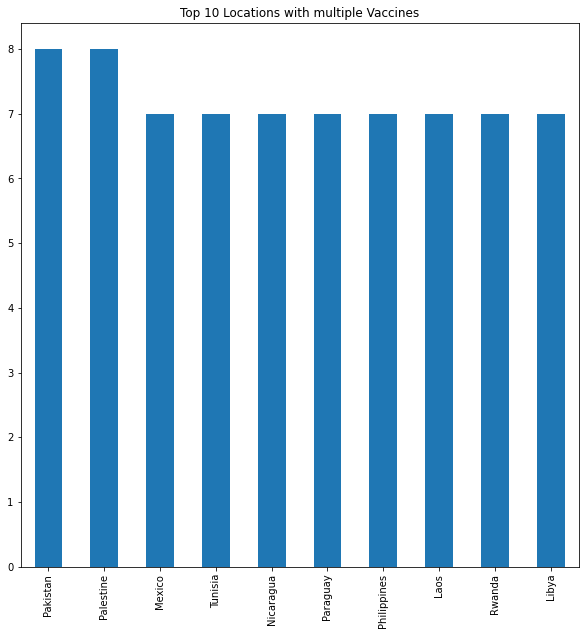

In [45]:
top10 = df2['Location'].value_counts()[:10]
top10.plot(kind='bar',figsize=(10,10))
plt.title('Top 10 Locations with multiple Vaccines') 

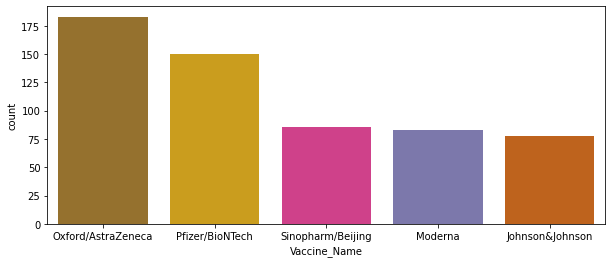

In [50]:
#plotting top 5 vaccines based on usage
plt.figure(figsize=(10, 4))
sns.countplot(x = "Vaccine_Name",data=df2, palette="Dark2_r", order=df2.Vaccine_Name.value_counts().iloc[:5].index)
plt.show()

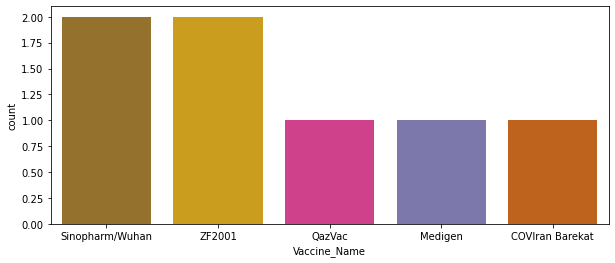

In [51]:
#plotting bottom 5 vaccines based on usage
plt.figure(figsize=(10, 4))
sns.countplot(x = "Vaccine_Name",data=df2, palette="Dark2_r", order=df2.Vaccine_Name.value_counts().iloc[-5:].index)
plt.show()

In [52]:
pd.Series(df2["Vaccine_Name"].value_counts()).rename_axis("Vaccine_Name").to_frame('Number of Locations Used')

,Number of Locations Used
Vaccine_Name,
Oxford/AstraZeneca,183
Pfizer/BioNTech,150
Sinopharm/Beijing,86
Moderna,83
Johnson&Johnson,78
Sputnik V,59
Sinovac,46
Covaxin,9
CanSino,7
